(60000, 28, 28)
(10000, 28, 28)
GPU name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


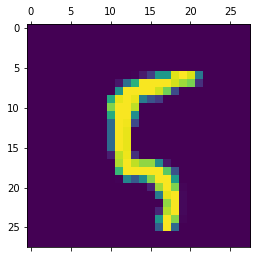

In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# scale the model!!!
X_train = X_train / 255
X_test = X_test / 255

plt.matshow(X_train[100])
print(X_train.shape)
print(X_test.shape)

print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))

In [7]:
# flatten training dataset: from 28 x 28 to 1 x 784 array
X_train_flatten = X_train.reshape(len(X_train), 28 * 28)
X_test_flatten = X_test.reshape(len(X_test), 28 * 28)

# def the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28 * 28, )), # so that we don't need to flatten our data
    keras.layers.Dense(200, activation='relu'), # input layer, try 100 units
    keras.layers.Dense(10, activation='sigmoid') # hidden layer
])


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy']) # 1 hot encoded array (also can use mean_square_error)

# train the model
model.fit(X_train_flatten, y_train, epochs=8)


Epoch 1/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2353 - accuracy: 0.9321
Epoch 2/8
1875/1875 [==============================] - 2s 945us/step - loss: 0.0981 - accuracy: 0.9710
Epoch 3/8
1875/1875 [==============================] - 2s 955us/step - loss: 0.0661 - accuracy: 0.9800
Epoch 4/8
1875/1875 [==============================] - 2s 941us/step - loss: 0.0483 - accuracy: 0.9853
Epoch 5/8
1875/1875 [==============================] - 2s 947us/step - loss: 0.0366 - accuracy: 0.9886
Epoch 6/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0270 - accuracy: 0.9915
Epoch 7/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0227 - accuracy: 0.9926
Epoch 8/8
1875/1875 [==============================] - 2s 986us/step - loss: 0.0164 - accuracy: 0.9949


In [8]:
# evaluate the model
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 943us/step - loss: 0.0680 - accuracy: 0.9801


[0.0680079236626625, 0.9800999760627747]

0


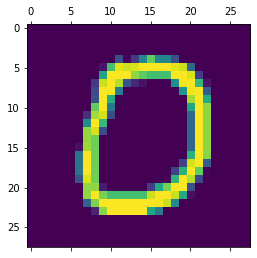

In [9]:
# predict the model
y_predicted = model.predict(X_test_flatten)

plt.matshow(X_test[10])
print(np.argmax(y_predicted[10])) # prediction

Text(69.0, 0.5, 'Actual')

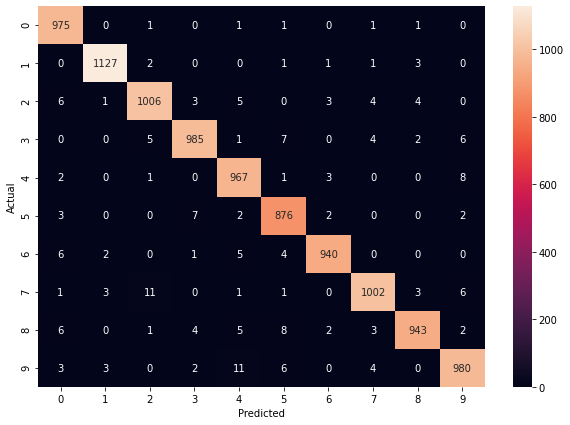

In [10]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=y_test, predictions=[np.argmax(i) for i in y_predicted])

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")